In [1]:
# import pandas as pd
#
# merged_df = pd.read_csv('../sensitive/merged.csv')

# Generate Sample Data for eval

In [2]:
# def sample_pairs(df, coder1, coder2, agreement_col, n=100):
#     tmp_df = df[df[agreement_col] < 1]
#     sampled_df = tmp_df[[coder1, coder2, agreement_col]].dropna().sample(n=min(n, df.shape[0]), random_state=42)
#     sampled_df.columns = ['Code1', 'Code2', 'Agreement']
#     sampled_df['joined'] = sampled_df['Code1'] + ' | '+ sampled_df['Code2']
#     return sampled_df
#
# sampled_AB = sample_pairs(merged_df, 'Code_gemma', 'Code_llama', 'AgreementGL')
# sampled_AB['OG'] = 'GL'
# sampled_AC = sample_pairs(merged_df, 'Code_gemma', 'Code_qwen', 'AgreementGQ')
# sampled_AC['OG'] = 'GQ'
# sampled_BC = sample_pairs(merged_df, 'Code_llama', 'Code_qwen', 'AgreementLQ')
# sampled_BC['OG'] = 'LQ'
#
# # Combine all samples into one dataset
# sampled_data = pd.concat([sampled_AB, sampled_AC, sampled_BC], ignore_index=True)
#
# # sampled_data.sample(frac=1).reset_index(drop=True).to_csv('shuffled_sample.csv', index=False)
#
# # sampled_data

# Examine survey results

In [3]:
import pandas as pd
df = pd.read_csv('shuffled_sample.csv')
df_resp1 = pd.read_csv('FormResponses0_150.csv').dropna(axis=1, how='all').drop(columns='Timestamp').transpose()
df_resp2 = pd.read_csv('FormResponses150_300.csv').dropna(axis=1, how='all').drop(columns='Timestamp').transpose()
df_resp = pd.concat([df_resp1, df_resp2]).reset_index()

In [4]:
df_resp['target'] = df_resp['index'].apply(lambda x: x.split('|')[0].strip())
df_resp

,index,0,1,2,3,4,5,6,target
0,Investment in Recreation | Investment in Recre...,True,True,False,False,True,True,False,Investment in Recreation
1,Limited Health Observations | Lack Specific Ob...,False,False,False,False,False,False,False,Limited Health Observations
2,Emerging Depression in Youth | Depression in Y...,True,False,True,False,False,True,False,Emerging Depression in Youth
3,Weight Gain as Coping Mechanism | Weight Gain ...,False,False,False,True,True,False,True,Weight Gain as Coping Mechanism
4,Regret and Habit Change | Regret and Hindsight,False,False,True,False,False,False,False,Regret and Habit Change
...,...,...,...,...,...,...,...,...,...
295,\nComplexity of Mental Illness | Complex Patie...,False,False,False,False,False,False,False,Complexity of Mental Illness
296,\nAge-Related Vulnerability | Impact on Younge...,True,True,False,True,False,True,False,Age-Related Vulnerability
297,\nAlternative Exercise Options | Comfortable E...,False,False,False,False,False,False,False,Alternative Exercise Options
298,\nYouth Activity Levels | Distance from Campus,False,False,False,False,False,False,False,Youth Activity Levels


In [5]:
import numpy as np
df1 = pd.merge(df, df_resp, left_on='Code1', right_on='target', how='left')
df1 = df1.drop(columns=['joined', 'index'])

In [6]:
cols = [0,1,2,3,4,5,6]
row_sums = df1[cols].sum(axis=1, skipna=True)
valid_counts = (~df1[cols].isna()).sum(axis=1)
df1['ratio'] = np.where(valid_counts > 0, row_sums / valid_counts, np.nan)

In [7]:
df1

,Code1,Code2,Agreement,OG,0,1,2,3,4,5,6,target,ratio
0,Investment in Recreation,Investment in Recreation Programs,0.923914,LQ,True,True,False,False,True,True,False,Investment in Recreation,0.571429
1,Limited Health Observations,Lack Specific Observations,0.530641,LQ,False,False,False,False,False,False,False,Limited Health Observations,0.000000
2,Emerging Depression in Youth,Depression in Youth,0.888181,GL,True,False,True,False,False,True,False,Emerging Depression in Youth,0.428571
3,Weight Gain as Coping Mechanism,Weight Gain as Defense Mechanism,0.611641,LQ,False,False,False,True,True,False,True,Weight Gain as Coping Mechanism,0.428571
4,Regret and Habit Change,Regret and Hindsight,0.698960,GL,False,False,True,False,False,False,False,Regret and Habit Change,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Infrastructure Limitations,Substandard Infrastructure,0.620964,LQ,True,True,False,True,True,True,False,Infrastructure Limitations,0.714286
300,Complexity of Mental Illness,Complex Patient Case,0.389533,LQ,False,False,False,False,False,False,False,Complexity of Mental Illness,0.000000
301,Age-Related Vulnerability,Impact on Younger People,0.565200,GQ,True,True,False,True,False,True,False,Age-Related Vulnerability,0.571429
302,Alternative Exercise Options,Comfortable Environment,0.174939,LQ,False,False,False,False,False,False,False,Alternative Exercise Options,0.000000


/var/folders/fk/rsz_slmj7wj_dw8gjqj0qvsc0000gn/T/ipykernel_18363/35995782.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df1.groupby('Agreement_bin')['ratio'].mean().reset_index()
/var/folders/fk/rsz_slmj7wj_dw8gjqj0qvsc0000gn/T/ipykernel_18363/35995782.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Agreement_bin', y='ratio', palette='mako')


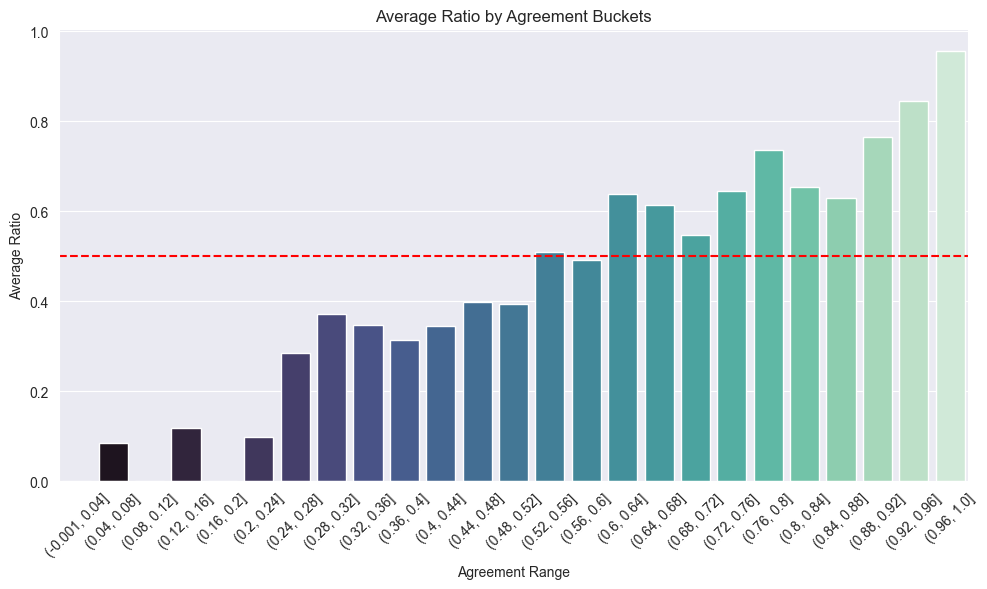

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def makeChart(df1):
    num_bins = 25  # or use list like bins=[0, 10, 20, 30, ...]

    # Create buckets from the 'Agreement' column
    bin_edges = np.linspace(0, 1, num_bins + 1)
    df1['Agreement_bin'] = pd.cut(df1['Agreement'], bins=bin_edges, include_lowest=True)

    # Group by the binned column and calculate mean ratio (or sum, or count, depending on your use case)
    grouped = df1.groupby('Agreement_bin')['ratio'].mean().reset_index()

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped, x='Agreement_bin', y='ratio', palette='mako')

    plt.axhline(y=0.5, color='red', linestyle='--')


    plt.title('Average Ratio by Agreement Buckets')
    plt.xlabel('Agreement Range')
    plt.ylabel('Average Ratio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

makeChart(df1)

/var/folders/fk/rsz_slmj7wj_dw8gjqj0qvsc0000gn/T/ipykernel_18363/1949243912.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df1.groupby('Agreement_bin')['ratio'].mean().reset_index()


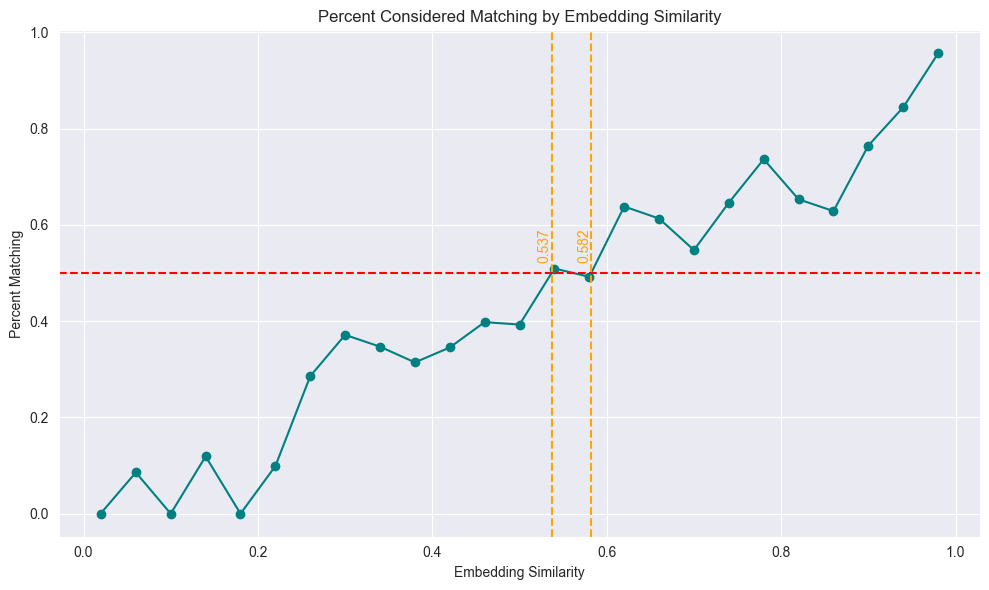

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def makeChart(df1):
    num_bins = 25
    bin_edges = np.linspace(0, 1, num_bins + 1)

    # Bin Agreement values
    df1['Agreement_bin'] = pd.cut(df1['Agreement'], bins=bin_edges, include_lowest=True)

    # Group and get mean ratio for each bin
    grouped = df1.groupby('Agreement_bin')['ratio'].mean().reset_index()
    grouped['bin_mid'] = grouped['Agreement_bin'].apply(lambda x: x.mid)

    # Find where line crosses 0.5
    crossings = []
    for i in range(len(grouped) - 1):
        y1, y2 = grouped.loc[i, 'ratio'], grouped.loc[i + 1, 'ratio']
        if (y1 < 0.5 and y2 >= 0.5):
            x1, x2 = grouped.loc[i, 'bin_mid'], grouped.loc[i + 1, 'bin_mid']
            slope = (y2 - y1) / (x2 - x1)
            cross_point = x1 + (0.5 - y1) / slope
            crossings.append(cross_point)

    # Plot the binned line
    plt.figure(figsize=(10, 6))
    plt.plot(grouped['bin_mid'], grouped['ratio'], marker='o', linestyle='-', color='teal')

    # Horizontal reference line at 0.5
    plt.axhline(y=0.5, color='red', linestyle='--')

    # Vertical lines at crossing points
    for cp in crossings:
        plt.axvline(x=cp, color='orange', linestyle='--')
        plt.text(cp, 0.52, f'{cp:.3f}', rotation=90, va='bottom', ha='right', color='orange')

    plt.title('Percent Considered Matching by Embedding Similarity')
    plt.xlabel('Embedding Similarity')
    plt.ylabel('Percent Matching')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

makeChart(df1)